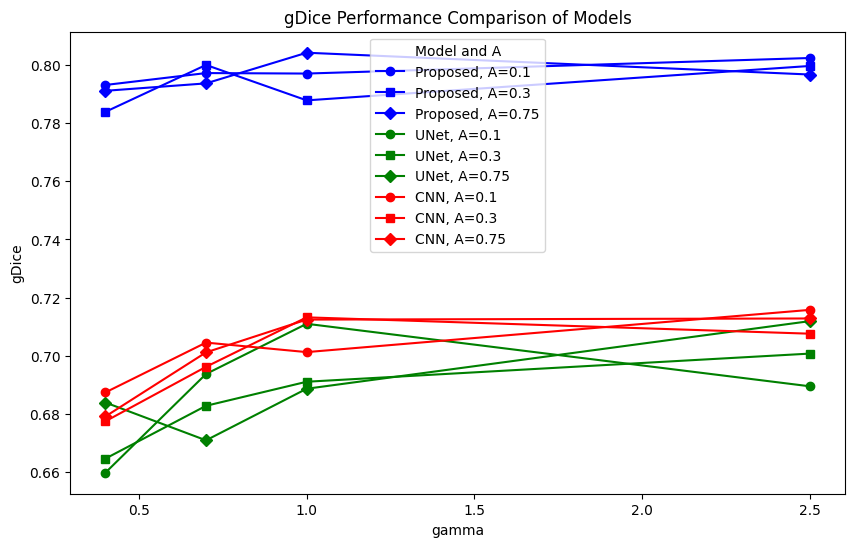

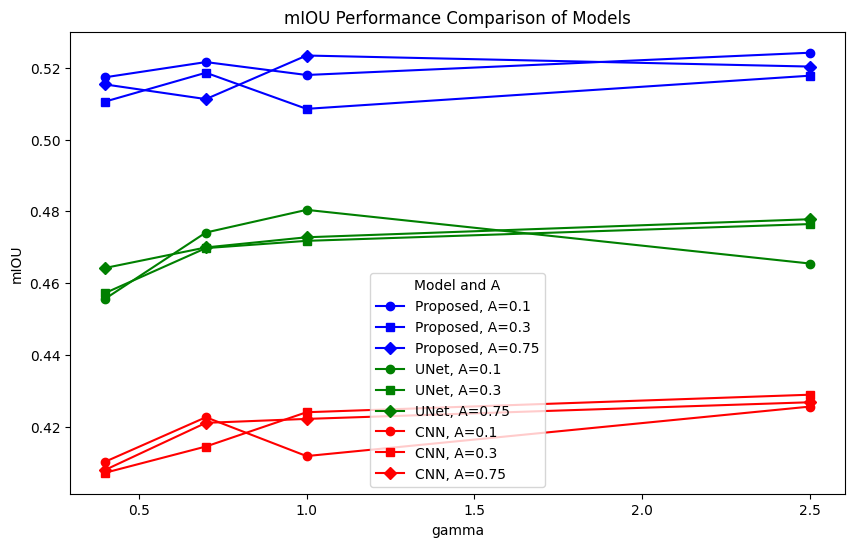

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the CSV data
csv_data = """model,gamma,A,mIOU,gDice
ca_siamese,0.4,0.1,[0.3483811  0.5285799  0.56471145 0.6277358 ],0.7930811
unet,0.4,0.1,[0.28184667 0.43592086 0.5425397  0.5624456 ],0.65987754
cnn,0.4,0.1,[0.16569906 0.38717037 0.544256   0.5440606 ],0.68745834
ca_siamese,0.4,0.3,[0.33771706 0.5220248  0.56309116 0.61953056],0.7838455
unet,0.4,0.3,[0.2883033  0.44122842 0.5388773  0.56071544],0.66471493
cnn,0.4,0.3,[0.17243248 0.3859236  0.54646057 0.52405965],0.67754334
ca_siamese,0.4,0.75,[0.34375685 0.5220874  0.5648417  0.6307169 ],0.79108185
unet,0.4,0.75,[0.29418218 0.4466004  0.54429597 0.5719161 ],0.6840002
cnn,0.4,0.75,[0.17236057 0.40248862 0.5447723  0.51245207],0.6791968
ca_siamese,0.7,0.1,[0.35064867 0.53603387 0.5642865  0.6353593 ],0.79717547
unet,0.7,0.1,[0.30453733 0.46287015 0.55133575 0.57771105],0.69379634
cnn,0.7,0.1,[0.1777147  0.41835198 0.5507486  0.543871  ],0.7045838
ca_siamese,0.7,0.3,[0.3348647  0.53874797 0.56635207 0.63449144],0.79996467
unet,0.7,0.3,[0.30580118 0.45478538 0.5433014  0.5752051 ],0.6828648
cnn,0.7,0.3,[0.16524614 0.3955239  0.54821974 0.5490857 ],0.6962619
ca_siamese,0.7,0.75,[0.32839411 0.528107   0.563491   0.62509394],0.79363066
unet,0.7,0.75,[0.30434018 0.4575181  0.5388058  0.5791746 ],0.67100924
cnn,0.7,0.75,[0.18650758 0.40897146 0.55205625 0.53690827],0.7012197
ca_siamese,1.0,0.1,[0.33931923 0.5332109  0.5655303  0.6338792 ],0.79700637
unet,1.0,0.1,[0.3086449  0.4736678  0.54926664 0.59012055],0.7110407
cnn,1.0,0.1,[0.1521508  0.38917223 0.5533336  0.5527653 ],0.7013129
ca_siamese,1.0,0.3,[0.32547933 0.5229246  0.5608164  0.6249933 ],0.7877956
unet,1.0,0.3,[0.30551153 0.45735958 0.5419051  0.58239377],0.6911342
cnn,1.0,0.3,[0.17824048 0.4134121  0.55284333 0.5517618 ],0.7132564
ca_siamese,1.0,0.75,[0.34573555 0.539745   0.5660726  0.6420754 ],0.80416405
unet,1.0,0.75,[0.30757234 0.46045557 0.54157025 0.58156407],0.6887308
cnn,1.0,0.75,[0.16895507 0.4113391  0.55239767 0.55613595],0.7124868
ca_siamese,2.5,0.1,[0.35438812 0.5381526  0.56571627 0.6384888 ],0.8023495
unet,2.5,0.1,[0.28978735 0.45284432 0.53853095 0.5807616 ],0.68956494
cnn,2.5,0.1,[0.18350634 0.4035418  0.5516147  0.563875  ],0.71582377
ca_siamese,2.5,0.3,[0.341402   0.53255796 0.56236213 0.63482386],0.7996164
unet,2.5,0.3,[0.30959842 0.46748337 0.54235995 0.58642167],0.70080405
cnn,2.5,0.3,[0.19436339 0.42097366 0.5523852  0.54805475],0.7076388
ca_siamese,2.5,0.75,[0.35361868 0.5316367  0.5624664  0.6336138 ],0.796673
unet,2.5,0.75,[0.30930048 0.4694457  0.5471233  0.58539075],0.7119592
cnn,2.5,0.75,[0.19308427 0.4320265  0.5540449  0.52821404],0.7128684"""

# Reading the data from the CSV formatted string
from io import StringIO

data = pd.read_csv(StringIO(csv_data))

# Define the models
models = {'ca_siamese': 'Proposed', 'unet': 'UNet', 'cnn': 'CNN'}

# Replace model names with the user-friendly names
data['model'] = data['model'].replace(models)

# Convert string representations of lists to actual lists and then calculate the mean
data['mIOU'] = data['mIOU'].apply(lambda x: np.mean([float(i) for i in x.strip('[]').split()]))

# Define the markers for different values of A
markers = {0.1: 'o', 0.3: 's', 0.75: 'D'}

# Define colors for different models
colors = {'Proposed': 'blue', 'UNet': 'green', 'CNN': 'red'}

# Plot performance comparison of the models for gDice with different values of A
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['gDice'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

ax.set_title('gDice Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('gDice')
ax.legend(title='Model and A')

plt.show()

# Plot performance comparison of the models for mIOU with different values of A
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['mIOU'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

ax.set_title('mIOU Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('mIOU')
ax.legend(title='Model and A')

plt.show()

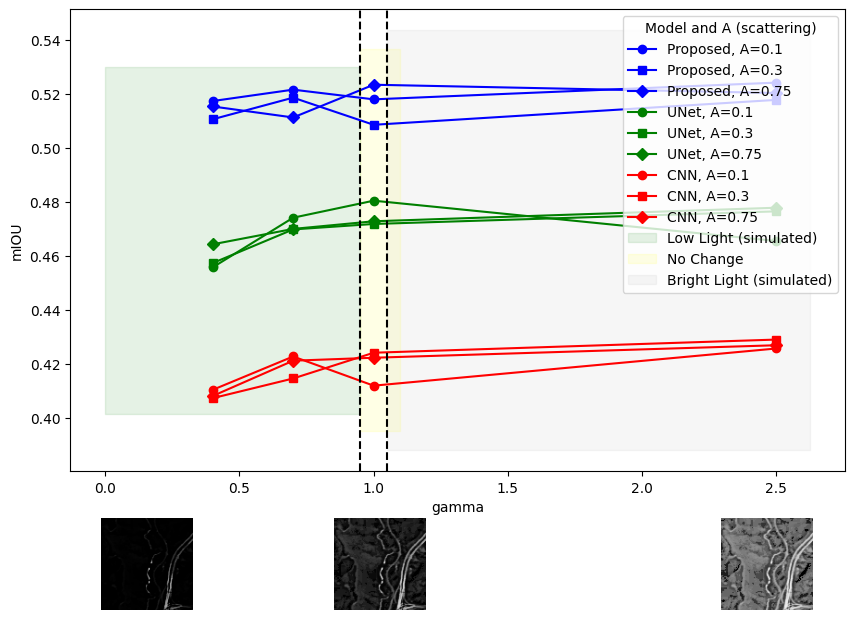

In [40]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to add images below the x-axis
def add_images(ax, images, positions):
    for image_path, pos in zip(images, positions):
        img = plt.imread(image_path)
        axins = ax.inset_axes(
        (pos, -0.3, 0.2, 0.2),
        xlim=(0, 100), ylim=(0, 100), xticklabels=[], yticklabels=[])
        axins.set_axis_off()
        axins.imshow(img, origin='lower')

# Create the plot for gDice
# fig, ax = plt.subplots(figsize=(10, 6))
# for model in data['model'].unique():
#     for A in data['A'].unique():
#         subset = data[(data['model'] == model) & (data['A'] == A)]
#         ax.plot(subset['gamma'], subset['gDice'], label=f"{model}, A={A}", 
#                 color=colors[model], marker=markers[A], linestyle='-')

# # Add vertical lines and shaded regions
# ax.axvline(x=0.99, color='black', linestyle='--')
# ax.axvline(x=1.1, color='black', linestyle='--')
# ax.fill_betweenx(ax.get_ylim(), 0, 0.99, color='gray', alpha=0.1, label='Bright Light')
# ax.fill_betweenx(ax.get_ylim(), 0.99, 1.1, color='yellow', alpha=0.1, label='No Change')
# ax.fill_betweenx(ax.get_ylim(), 1.1, ax.get_xlim()[1], color='darkgray', alpha=0.1, label='Low Light')

# Add images below the x-axis
base_path = "../images/gamma"
images = [f'{base_path}/0.4.png', f'{base_path}/1.0.png', f'{base_path}/2.5.png']  # Replace with actual paths
positions = [0.0, 0.3, 0.8]  # X positions for the images
# add_images(ax, images, positions, y_offset=-0.05)

# ax.set_title('gDice Performance Comparison of Models')
# ax.set_xlabel('gamma')
# ax.set_ylabel('gDice')
# ax.legend(title='Model and A', loc='upper right')

# # Save the plot as a PDF
# plt.savefig('gdice_performance.pdf')
# plt.show()
# Plot for mIOU
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['mIOU'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

# Add vertical lines and shaded regions
ax.axvline(x=0.95, color='black', linestyle='--')
ax.axvline(x=1.05, color='black', linestyle='--')
ax.fill_betweenx(ax.get_ylim(), 0, 0.95, color='green', alpha=0.1, label='Low Light (simulated)')
ax.fill_betweenx(ax.get_ylim(), 0.95, 1.1, color='yellow', alpha=0.1, label='No Change')
ax.fill_betweenx(ax.get_ylim(), 1.05, ax.get_xlim()[1], color='darkgray', alpha=0.1, label='Bright Light (simulated)')

# Add images below the x-axis
add_images(ax, images, positions)

# ax.set_title('mIOU Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('mIOU')
ax.legend(title='Model and A (scattering)', loc='upper right')

# Save the plot as a PDF
plt.savefig('miou_performance.pdf', bbox_inches='tight', pad_inches=0.2)
plt.show()